In [61]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [62]:
dir = "p_date=2023-01-15-14_57_23"

In [63]:
path = f'../../output/weights/{dir}/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

36001 records
dict_keys(['loss', 'mae', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [64]:
slice = 100_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [65]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

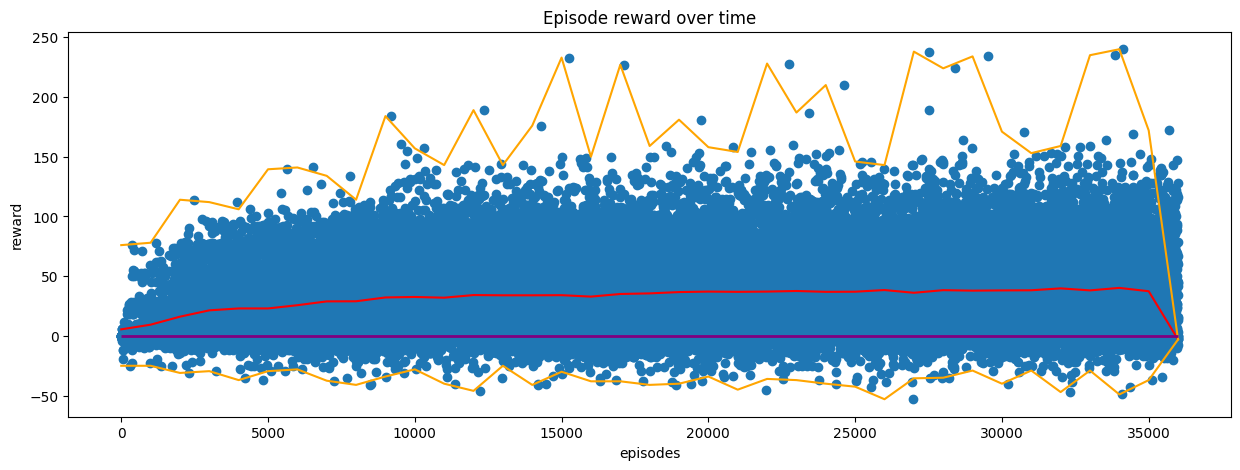

Maximum: 240.0
Average: 32.236418432821374

Values: 5.5 > 9.4 > 16.1 > 21.4 > 23.0 > 23.0 > 25.7 > 28.9 > 29.0 > 32.2 > 32.6 > 32.0 > 34.2 > 34.0 > 34.0 > 34.1 > 32.9 > 35.1 > 35.6 > 36.7 > 37.1 > 36.9 > 37.1 > 37.6 > 36.9 > 37.0 > 38.4 > 36.1 > 38.3 > 37.9 > 38.1 > 38.2 > 39.8 > 38.1 > 40.2 > 37.4 > -3.0

Minimum (last 1000): -53.0
Average (last 1000): 32.09215165280992
Maximum (last 1000): 240.0


In [66]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

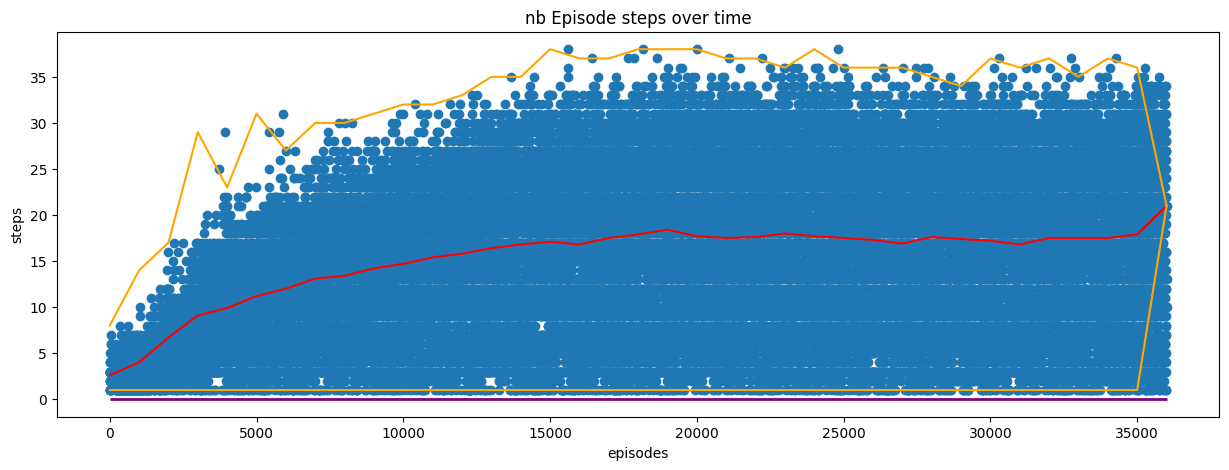

Maximum: 38
Average: 15.073942390489153

Values: 2.6 > 4.0 > 6.7 > 9.1 > 9.9 > 11.2 > 12.0 > 13.1 > 13.4 > 14.2 > 14.7 > 15.4 > 15.8 > 16.4 > 16.8 > 17.1 > 16.8 > 17.5 > 17.9 > 18.4 > 17.7 > 17.5 > 17.6 > 18.0 > 17.7 > 17.5 > 17.3 > 16.9 > 17.6 > 17.4 > 17.2 > 16.8 > 17.5 > 17.5 > 17.5 > 17.9 > 21

Minimum (last 1000): 1
Average (last 1000): 14.992571640810263
Maximum (last 1000): 38


In [67]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

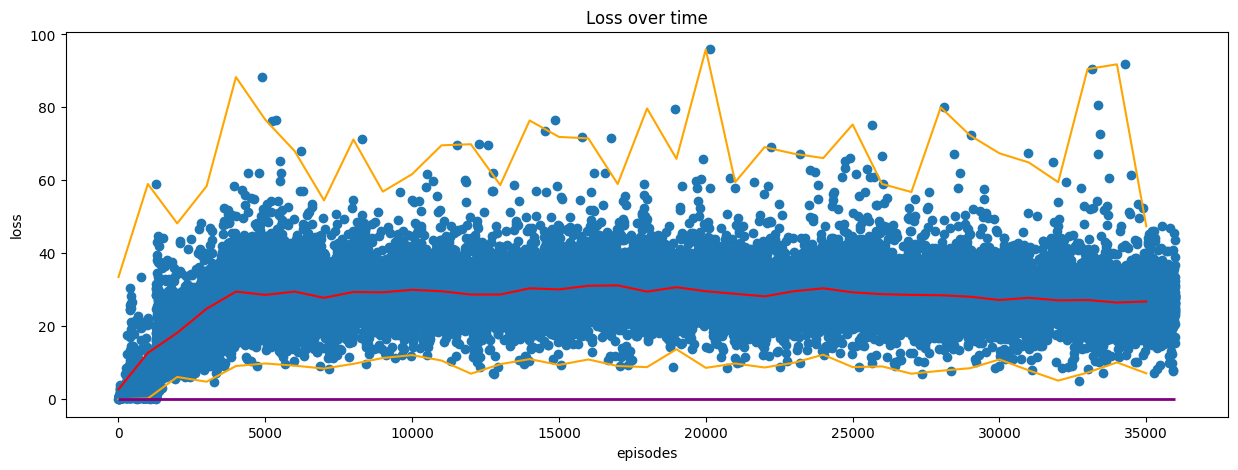

Maximum: 95.9404296875
Average: 27.357950621095817

Values: 2.7 > 12.7 > 18.2 > 24.8 > 29.5 > 28.6 > 29.5 > 27.8 > 29.4 > 29.3 > 30.0 > 29.6 > 28.7 > 28.7 > 30.4 > 30.1 > 31.1 > 31.2 > 29.5 > 30.7 > 29.6 > 28.9 > 28.2 > 29.6 > 30.4 > 29.3 > 28.8 > 28.6 > 28.5 > 28.1 > 27.2 > 27.8 > 27.1 > 27.2 > 26.5 > 26.8

Minimum (last 1000): 0.01699851080775261
Average (last 1000): 27.37364857209678
Maximum (last 1000): 95.9404296875


In [68]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

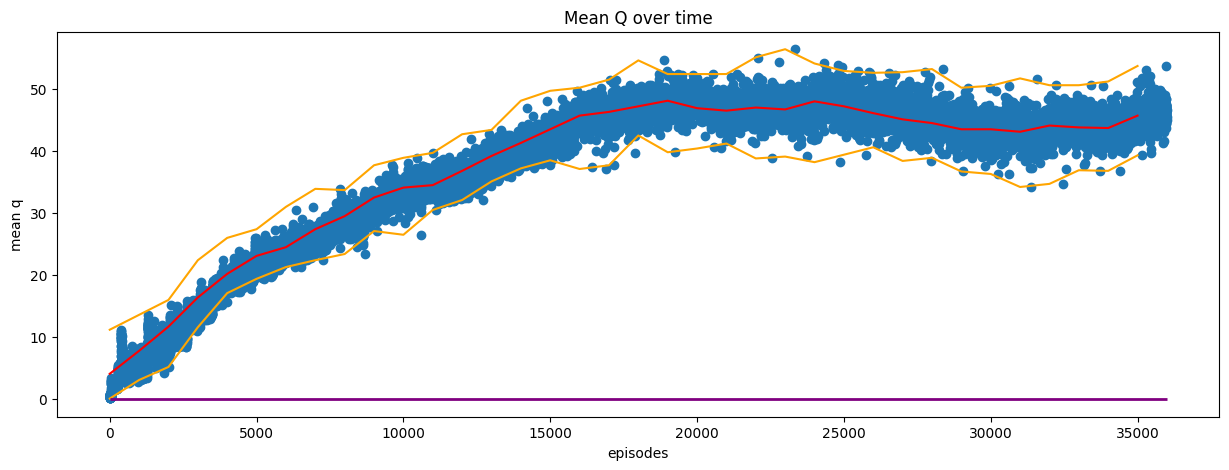

Maximum: 56.38115692138672
Average: 37.2003994247616

Values: 4.1 > 7.8 > 11.7 > 16.4 > 20.2 > 23.1 > 24.5 > 27.4 > 29.5 > 32.5 > 34.1 > 34.5 > 36.8 > 39.2 > 41.3 > 43.5 > 45.7 > 46.3 > 47.2 > 48.1 > 46.9 > 46.5 > 47.0 > 46.7 > 48.0 > 47.2 > 46.1 > 45.1 > 44.5 > 43.5 > 43.5 > 43.1 > 44.1 > 43.8 > 43.7 > 45.7

Minimum (last 1000): 0.11884932219982147
Average (last 1000): 36.956603674691905
Maximum (last 1000): 56.38115692138672


In [69]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

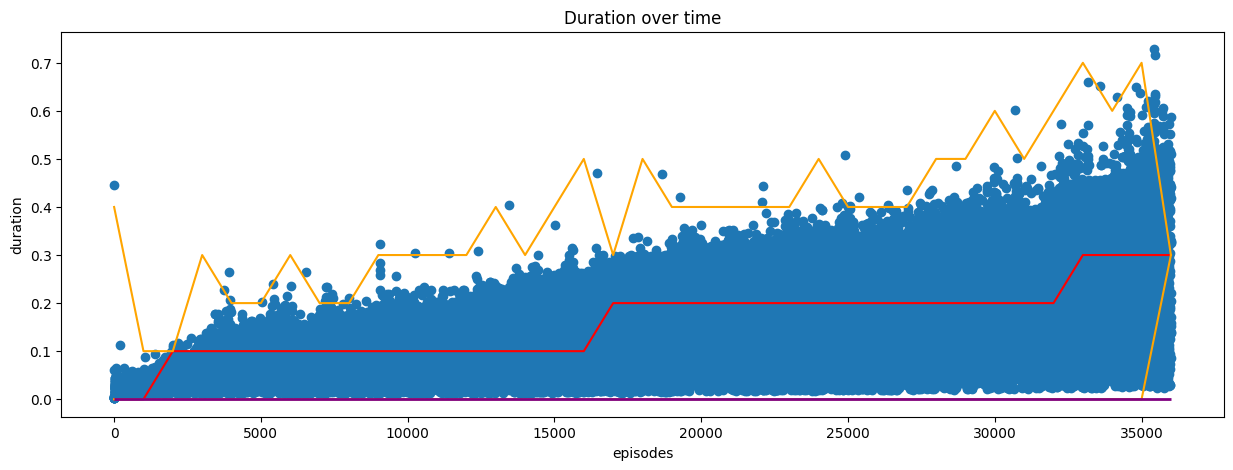

ZeroDivisionError: float division by zero

In [70]:
plot(duration, "Duration over time", "episodes", "duration")